In [1]:
# Step 0: imports and helper functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_breast_cancer, fetch_california_housing
import joblib
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
np.random.seed(42)

# Utility plotting helpers
def plot_pred_vs_actual(y_true, y_pred, title='Predicted vs Actual'):
    plt.figure(figsize=(6,5))
    plt.scatter(y_true, y_pred, alpha=0.6)
    minv = min(y_true.min(), y_pred.min())
    maxv = max(y_true.max(), y_pred.max())
    plt.plot([minv, maxv], [minv, maxv], '--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'RMSE': rmse, 'R2': r2}

def classification_metrics(y_true, y_pred, y_prob=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_prob) if y_prob is not None else None
    return {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1, 'ROC_AUC': roc}


In [2]:
#Load dataset
df_boston = pd.read_csv("./dataset/HousingData.csv")
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Coeff (slope): [9.34830141]
Intercept: -36.24631889813795
Regression metrics: {'MAE': 4.478335832064149, 'RMSE': 6.792994578778734, 'R2': 0.3707569232254778}


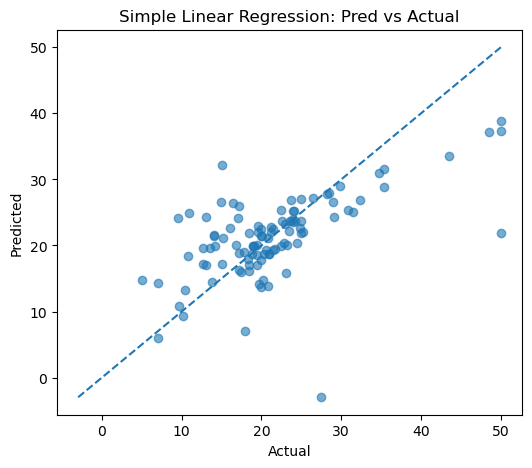

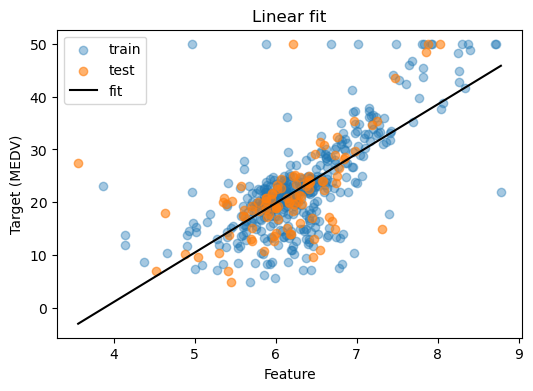

In [3]:
# Prepare single-feature X & y
if 'RM' in df_boston.columns:
    X = df_boston[['RM']].values  # single feature (reshape)
    y = df_boston['MEDV'].values
else:
    # fallback: pick 'AveRooms' from California or first numeric column
    if 'AveRooms' in df_boston.columns:
        X = df_boston[['AveRooms']].values
    else:
        X = df_boston[[df_boston.select_dtypes(float).columns[0]]].values
    y = df_boston['MEDV'].values

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit simple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Coeff (slope):", lr.coef_)
print("Intercept:", lr.intercept_)
print("Regression metrics:", regression_metrics(y_test, y_pred))

# plot
plot_pred_vs_actual(y_test, y_pred, title='Simple Linear Regression: Pred vs Actual')
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, label='train', alpha=0.4)
plt.scatter(X_test, y_test, label='test', alpha=0.6)
xx = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
plt.plot(xx, lr.predict(xx), color='black', label='fit')
plt.xlabel('Feature')
plt.ylabel('Target (MEDV)')
plt.legend()
plt.title('Linear fit')
plt.show()